Edgar Osvaldo Navarro García A01644488

# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
# Print dataset
print(dataset)



     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
# Print dataset shape
print(dataset.shape)


(150, 5)


In [5]:
# Print column names

print(dataset.columns)

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [6]:
# Drop na
print(dataset.isnull().sum())
dataset = dataset.dropna()
dataset.shape

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Flower          0
dtype: int64


(150, 5)

3. Encoding the class label categorical column: from string to num


In [7]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
print(dataset.dtypes)
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})
print(dataset.dtypes)
print(dataset.head())

#Visualize the dataset


Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Flower           object
dtype: object
Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Flower            int64
dtype: object
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


C:\Users\ngedg\AppData\Local\Temp\ipykernel_26320\1192218839.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})


Now the label/category is numeric


4. Discard columns that won't be used


In [8]:
# Drop out non necesary columns
#Todas se usan


5. Scatter plot of the data

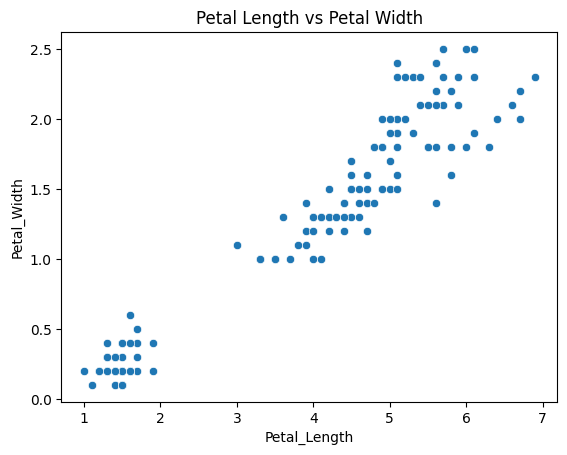

In [9]:
# Scatter plot of Petal_Length vs Petal_Width
sns.scatterplot(x = dataset.Petal_Length,y = dataset.Petal_Width)
plt.title("Petal Length vs Petal Width")
plt.show()



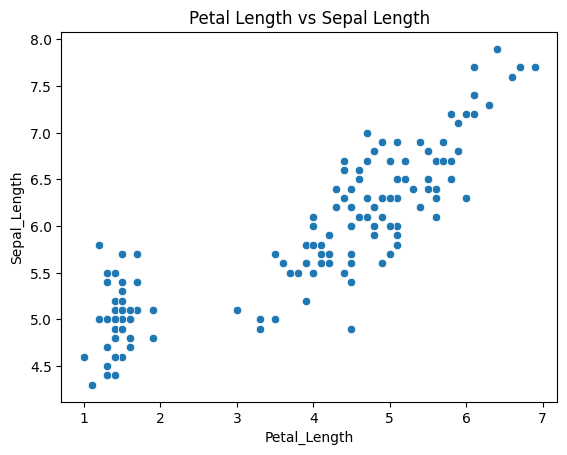

In [10]:
# Scatter plot of Petal_Length vs Sepal_Length
sns.scatterplot(x = dataset.Petal_Length,y = dataset.Sepal_Length)
plt.title("Petal Length vs Sepal Length")
plt.show()



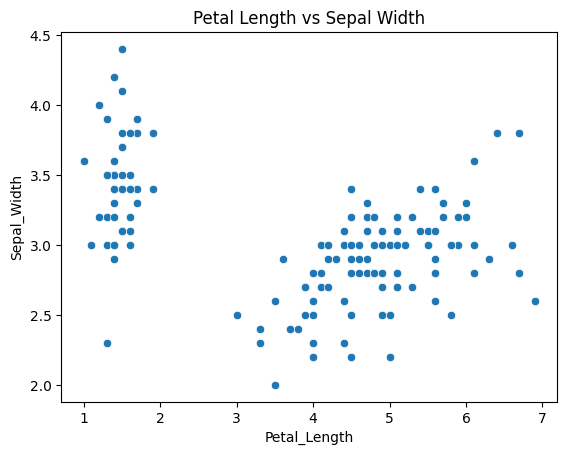

In [11]:
# Scatter plot of Petal_Length vs Sepal_Width
sns.scatterplot(x = dataset.Petal_Length,y = dataset.Sepal_Width)
plt.title("Petal Length vs Sepal Width")
plt.show()



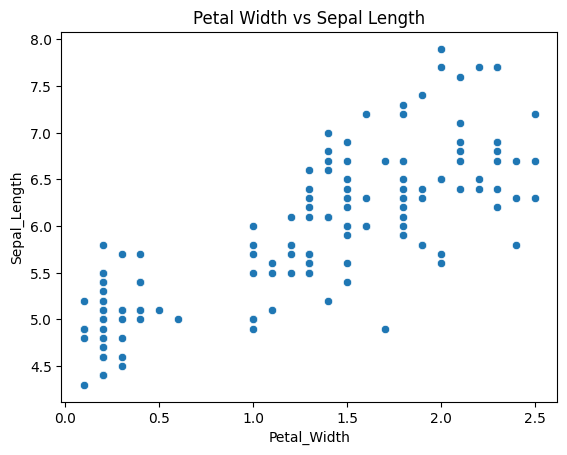

In [12]:
# Scatter plot of Petal_Width vs Sepal_Length

sns.scatterplot(y = dataset.Sepal_Length,x = dataset.Petal_Width)
plt.title("Petal Width vs Sepal Length")
plt.show()


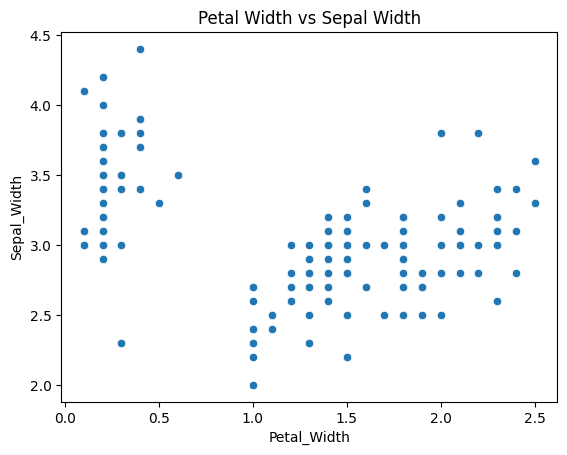

In [13]:
# Scatter plot of Petal_Width vs Sepal_Width

sns.scatterplot(y = dataset.Sepal_Width,x = dataset.Petal_Width)
plt.title("Petal Width vs Sepal Width")
plt.show()

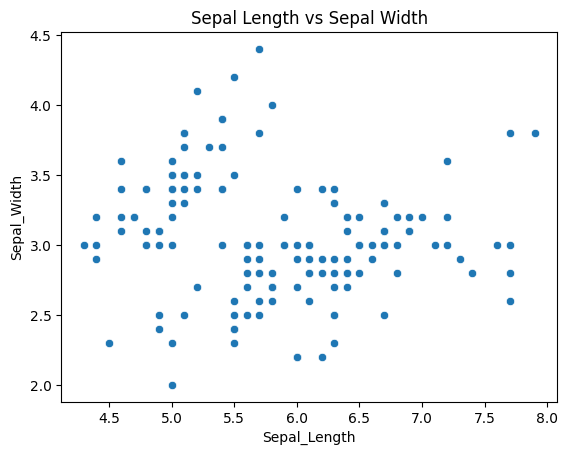

In [14]:
# Scatter plot of Sepal_Length vs Sepal_Width
sns.scatterplot(y = dataset.Sepal_Width,x = dataset.Sepal_Length)
plt.title("Sepal Length vs Sepal Width")
plt.show()



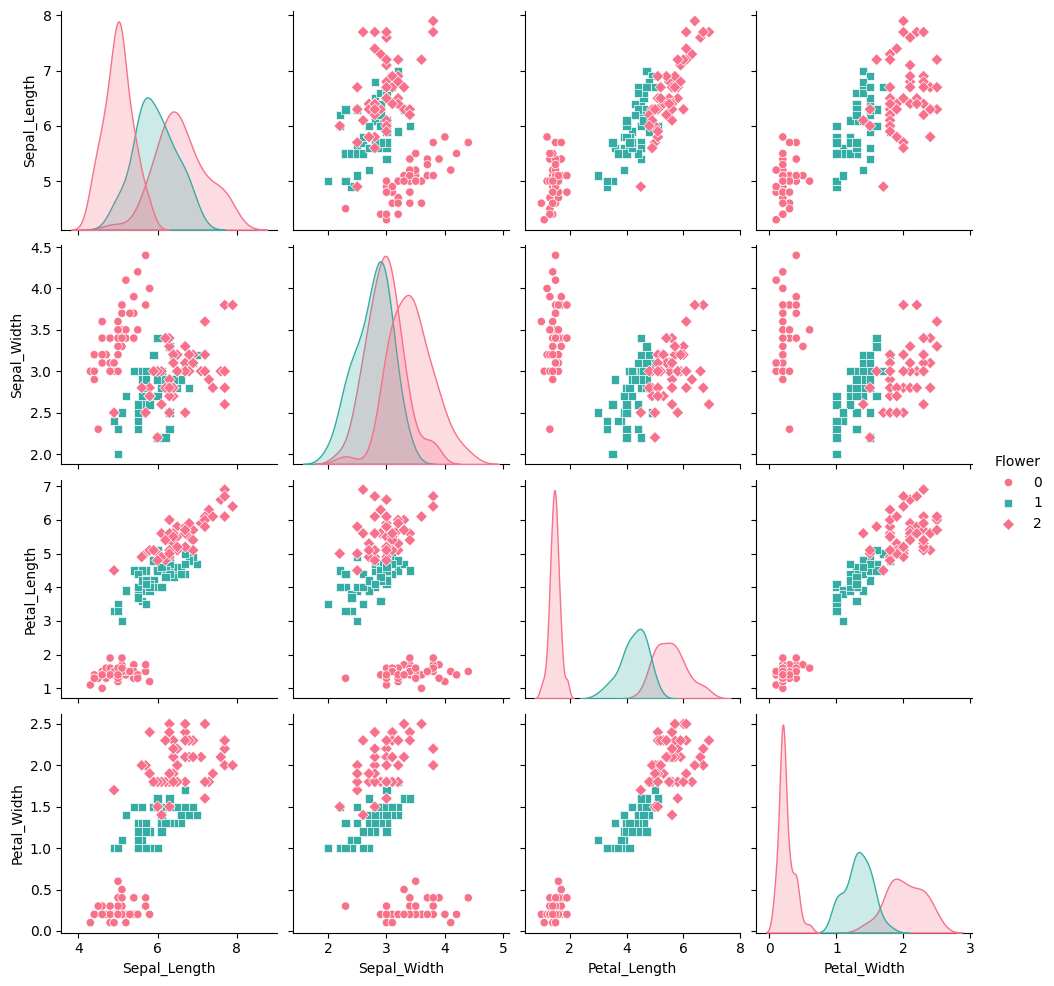

In [15]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset, hue="Flower", palette="husl", diag_kind="kde", markers=["o", "s", "D"])

#sns.pairplot (dataset.drop("Flower", axis=1))

plt.show()



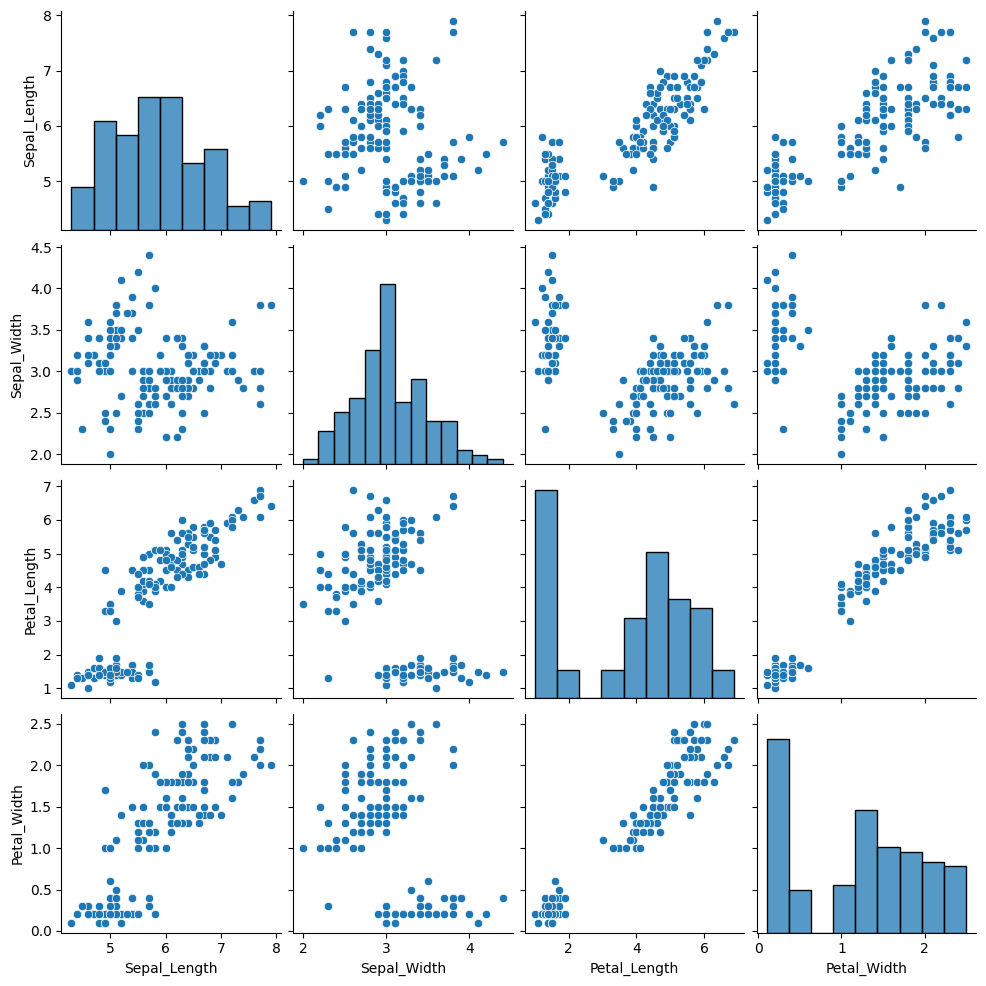

In [16]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot (dataset.drop("Flower", axis=1))

plt.show()



6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [17]:
# Get dataframes for each real cluster
dataset0 = dataset[dataset.Flower == 0]
dataset1 = dataset[dataset.Flower == 1]
dataset2 = dataset[dataset.Flower == 2]



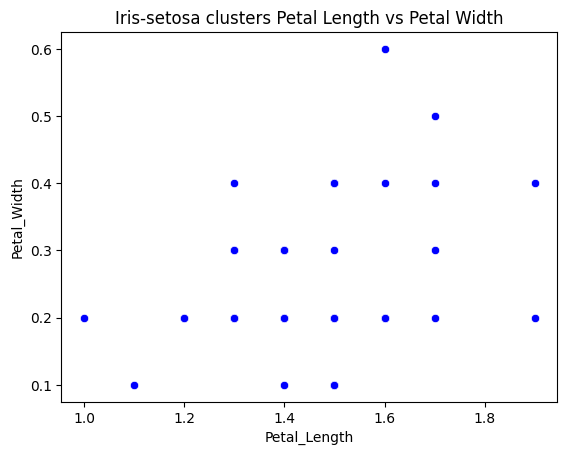

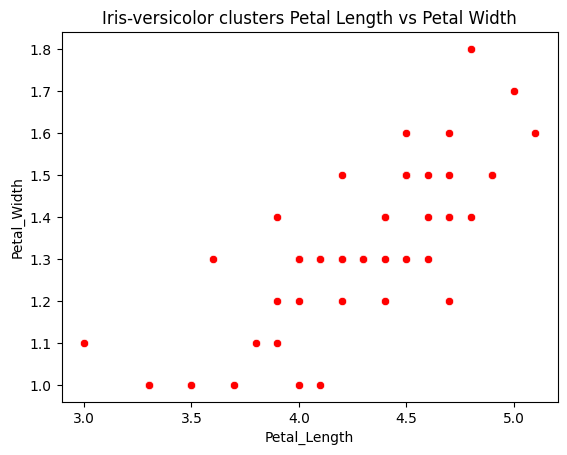

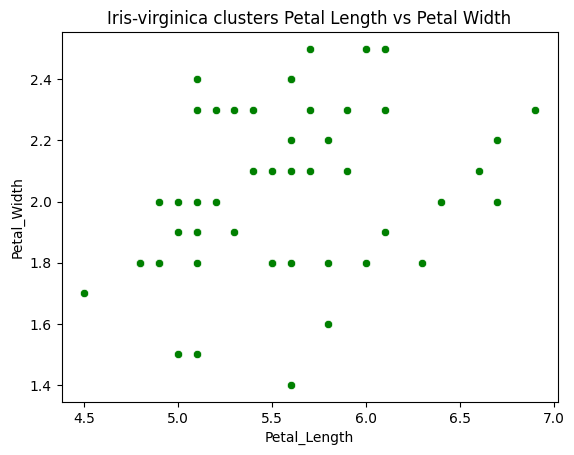

In [18]:
# Scatter plot of each real cluster for Petal
#{"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
sns.scatterplot(x = dataset0.Petal_Length,y = dataset0.Petal_Width, color = "blue")
plt.title("Iris-setosa clusters Petal Length vs Petal Width")
plt.show() 
sns.scatterplot(x = dataset1.Petal_Length,y = dataset1.Petal_Width, color = "red")
plt.title("Iris-versicolor clusters Petal Length vs Petal Width")
plt.show()
sns.scatterplot(x = dataset2.Petal_Length,y = dataset2.Petal_Width, color = "green")
plt.title("Iris-virginica clusters Petal Length vs Petal Width")
plt.show()

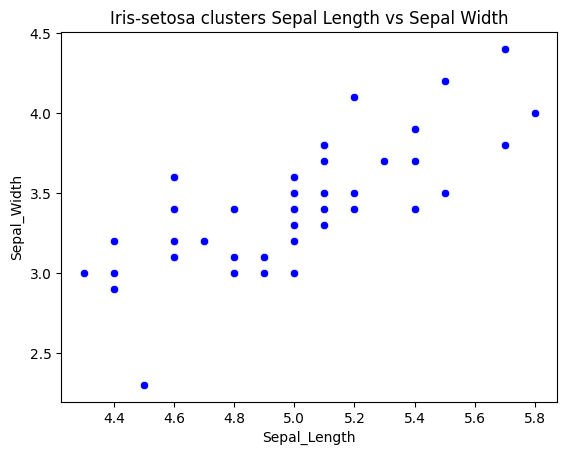

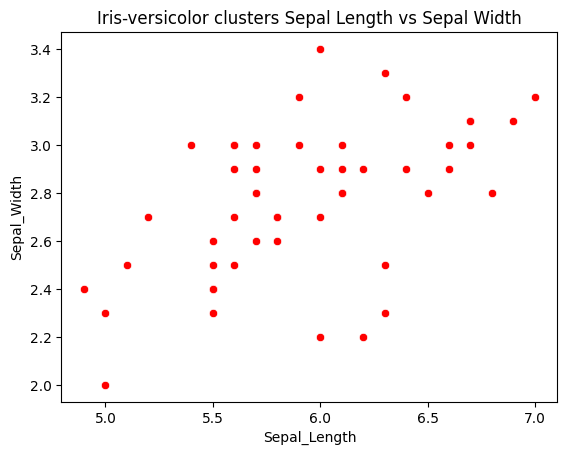

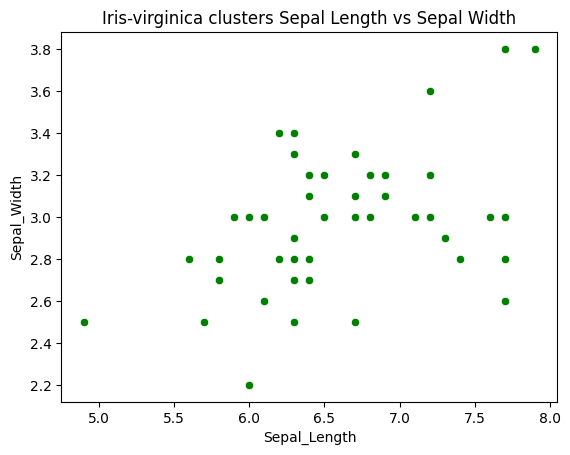

In [19]:
# Scatter plot of each real cluster for Sepal
sns.scatterplot(x = dataset0.Sepal_Length,y = dataset0.Sepal_Width, color = "blue")
plt.title("Iris-setosa clusters Sepal Length vs Sepal Width")
plt.show()
sns.scatterplot(x = dataset1.Sepal_Length,y = dataset1.Sepal_Width, color = "red")
plt.title("Iris-versicolor clusters Sepal Length vs Sepal Width")
plt.show()
sns.scatterplot(x = dataset2.Sepal_Length,y = dataset2.Sepal_Width, color = "green")
plt.title("Iris-virginica clusters Sepal Length vs Sepal Width")
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [20]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [21]:
# Understand the data X
print(X)
print(X.shape)
print(type(X))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [22]:
# Understand the data y
print(y)
print(y.shape)
print(type(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)
<class 'numpy.ndarray'>


In [23]:
# Calculate the number of observations in the dataset
print("El numero de observaciones es: " + str(y.shape[0]))

El numero de observaciones es: 150


In [24]:
# Calculate the number of observations for class 0
print("El numero de observaciones de clase 0 es: " + str(np.sum(y == 0)))


El numero de observaciones de clase 0 es: 50


In [25]:
# Calculate the number of observations for class 1
print("El numero de observaciones de clase 1 es: " + str(np.sum(y == 1)))


El numero de observaciones de clase 1 es: 50


In [26]:
# Calculate the number of observations for class 2
print("El numero de observaciones de clase 2 es: " + str(np.sum(y == 2)))


El numero de observaciones de clase 2 es: 50


# Train a classifier

## Train the classification model

In [27]:
# Import sklearn linear_model
import sklearn.linear_model as lm
# Initialize the classifier
modelo = lm.LogisticRegression()
# Fit the model to the training data
modelo.fit(X, y)

LogisticRegression()

## Predict the class of a new observation

In [28]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [29]:
# Make the prediction using xnew
modelo.predict(xnew)

# Get the predicted class
clase = modelo.predict(xnew)
if clase == 0:
    print("La clase predicha es: Iris-setosa")
elif clase == 1:
    print("La clase predicha es: Iris-versicolor")
else:
    print("La clase predicha es: Iris-virginica")


La clase predicha es: Iris-setosa


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [30]:
# Import sklearn train_test_split
import sklearn.model_selection as ms

# Split data in train and test sets
train_X, test_X, train_y, test_y = ms.train_test_split(X, y, train_size=0.7, random_state=0)


In [31]:
# Number of observations in the train set
print(train_X.shape[0])
print(train_y.shape[0])


105
105


In [32]:
# Number of observations of each class in the train set
print("Observaciones de Iris-setosa: " + str(np.sum(train_y == 0)))
print("Observaciones de Iris-versicolor: " + str(np.sum(train_y == 1)))
print("Observaciones de Iris-virginica: " + str(np.sum(train_y == 2)))



Observaciones de Iris-setosa: 34
Observaciones de Iris-versicolor: 32
Observaciones de Iris-virginica: 39


In [33]:
# Number of observations in the test set
print(test_X.shape[0])
print(test_y.shape[0])

45
45


In [34]:
# Number of observations of each class in the test set
print("Observaciones de Iris-setosa: " + str(np.sum(test_y == 0)))
print("Observaciones de Iris-versicolor: " + str(np.sum(test_y == 1)))
print("Observaciones de Iris-virginica: " + str(np.sum(test_y == 2)))

Observaciones de Iris-setosa: 16
Observaciones de Iris-versicolor: 18
Observaciones de Iris-virginica: 11


## Train the classification model

In [35]:
# Initialize the classifier
classmodel = lm.LogisticRegression()

# Fit the model to the training data
classmodel.fit(train_X, train_y)



LogisticRegression()

## Test the classification model

In [36]:
# Make the predictions using the test set
predicted_y = classmodel.predict(test_X)

In [37]:
# Explore real and predicted labels
print("Classes predichas: " + str(predicted_y))
print("Classes reales: " + str(test_y))



Classes predichas: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Classes reales: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


## Compute the acurracy

In [38]:

# Define a function to compute accuracy
def accuracy(real, predict):
    x = 0
    for i in range(0,len(real)):
        if real[i] == predict[i]:
            x = x + 1
    accuracy = x / len(real)
    return accuracy


In [39]:
# Calculate total accuracy
print("Accuracy: " + str(accuracy(test_y, predicted_y)))




Accuracy: 0.9777777777777777


In [40]:
# Calculate total accuracy using sklearn.metrics
import sklearn.metrics as mt
print("Accuracy: " + str(mt.accuracy_score(test_y, predicted_y)))


Accuracy: 0.9777777777777777


In [41]:
# Compute accuracy for class 0
precision_por_clase = mt.precision_score(test_y, predicted_y, average=None)
print("Precision para clase 0: " + str(precision_por_clase[0]))


Precision para clase 0: 1.0


In [42]:
# Compute accuracy for class 1

print("Precision para clase 1: " + str(precision_por_clase[1]))


Precision para clase 1: 1.0


In [43]:
# Compute accuracy for class 2
print("Precision para clase 2: " + str(precision_por_clase[2]))

for i in range(len(predicted_y)):
    if predicted_y[i] != test_y[i]:
        print("Prediccion incorrecta: " + str(predicted_y[i]))


Precision para clase 2: 0.9166666666666666
Prediccion incorrecta: 2


## Confussion matrix

In [44]:
# Compute confussion matrix (normalized confusion matrix)
mt.confusion_matrix(test_y, predicted_y, labels=[0, 1, 2], normalize="true")

array([[1.        , 0.        , 0.        ],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.        , 1.        ]])

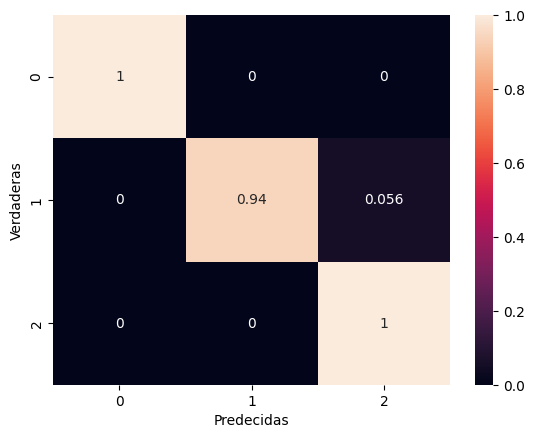

In [45]:
# Plot normalized confussion matrix
sns.heatmap(mt.confusion_matrix(test_y, predicted_y, labels=[0,1,2], normalize="true"), annot=True)
plt.xlabel('Predecidas')
plt.ylabel('Verdaderas')
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy? En este caso el que provee la mayor precision es el de todas las variables y el de las variables de petalos con una precisión de 97%, en cambio la que tiene la menor presición es la de los sepalos con una precisión de 82%


2) Using the four variables, try with two classifiers. Which provides the best performance? KneighboorsClassifier o LogisticRegression, tienen una mejor precision que neural_networks en esta ocasción

Todas las variables
Accuracy: 0.9777777777777777
Petalos
Accuracy: 0.9777777777777777
Sepalos
Accuracy: 0.8222222222222222
Knneighbours
Accuracy: 0.9777777777777777
Precision para clase 0: 1.0
Precision para clase 1: 1.0
Precision para clase 2: 0.9166666666666666
Confusion matrix: 


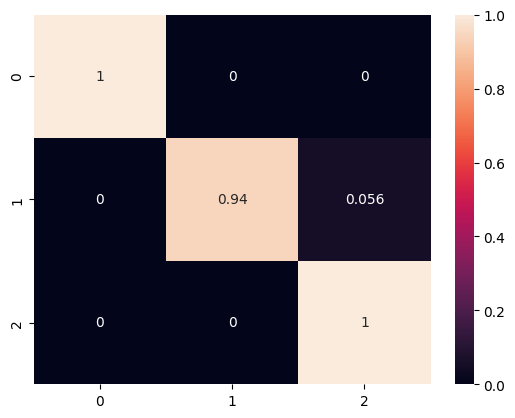

Neural
Accuracy: 0.9555555555555556
Precision para clase 0: 1.0
Precision para clase 1: 1.0
Precision para clase 2: 0.8461538461538461
Confusion matrix: 


d:\Phton\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


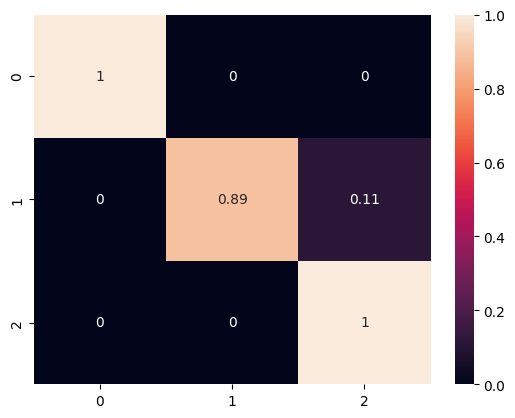

In [46]:
# Classificador con todas las variables
print("Todas las variables")
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
modelotodas = lm.LogisticRegression()
train_X, test_X, train_y, test_y = ms.train_test_split(X, y, train_size=0.7, random_state=0)
modelotodas.fit(train_X, train_y)
prediciontodas = modelotodas.predict(test_X)
print("Accuracy: " + str(mt.accuracy_score(test_y, prediciontodas)))

# Classificador con petalos
print("Petalos")
X  = dataset[["Petal_Length", "Petal_Width"]].values
modelopetalos = lm.LogisticRegression()
train_X, test_X, train_y, test_y = ms.train_test_split(X, y, train_size=0.7, random_state=0)
modelopetalos.fit(train_X, train_y)
predicionpetalos = modelopetalos.predict(test_X)
print("Accuracy: " + str(mt.accuracy_score(test_y, predicionpetalos)))


#Classificador con Sepalos
print("Sepalos")
X  = dataset[["Sepal_Length", "Sepal_Width"]].values
modelosepalos = lm.LogisticRegression()
train_X, test_X, train_y, test_y = ms.train_test_split(X, y, train_size=0.7, random_state=0)
modelopetalos.fit(train_X, train_y)
predicionsepalos = modelopetalos.predict(test_X)
print("Accuracy: " + str(mt.accuracy_score(test_y, predicionsepalos)))



#Con from sklearn.neighbors import KNeighborsClassifier

X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
train_X, test_X, train_y, test_y = ms.train_test_split(X, y, train_size=0.7, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

print("Knneighbours")
Neigh = KNeighborsClassifier(n_neighbors=3)
Neigh.fit(train_X, train_y)
predicted_y = Neigh.predict(test_X)
print("Accuracy: " + str(mt.accuracy_score(test_y, predicted_y)))
treeprecision_por_clase = mt.precision_score(test_y, predicted_y, average=None)
print("Precision para clase 0: " + str(treeprecision_por_clase[0]))
print("Precision para clase 1: " + str(treeprecision_por_clase[1]))
print("Precision para clase 2: " + str(treeprecision_por_clase[2]))
print("Confusion matrix: ")
sns.heatmap(mt.confusion_matrix(test_y, predicted_y, labels=[0,1,2], normalize="true"), annot=True)
plt.show()

print("Neural")
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(random_state=1, max_iter=300).fit(train_X, train_y)
predicted_y = neural.predict(test_X)
print("Accuracy: " + str(mt.accuracy_score(test_y, predicted_y)))
neuralprecision_por_clase = mt.precision_score(test_y, predicted_y, average=None)
print("Precision para clase 0: " + str(neuralprecision_por_clase[0]))
print("Precision para clase 1: " + str(neuralprecision_por_clase[1]))
print("Precision para clase 2: " + str(neuralprecision_por_clase[2]))
print("Confusion matrix: ")
sns.heatmap(mt.confusion_matrix(test_y, predicted_y, labels=[0,1,2], normalize="true"), annot=True)
plt.show()